In [1]:
import json

import matplotlib.pyplot as plt

In [2]:
BASELINE_JSON = "../data/baseline_overview.json"

In [3]:
baseline_metrics = json.load(open(BASELINE_JSON, "r"))
scenes = sorted(baseline_metrics.keys())
print(f"Loaded metrics for {len(scenes)} scenes")

Loaded metrics for 38 scenes


In [4]:
metrics = [
    "n_images",
    "n_reg_images",
    "perc_reg_images",
    "mean_reprojection_error",
    "mean_obs_per_reg_image",
    "n_observations",
    "mean_track_length",
    "mean_overlap",
]

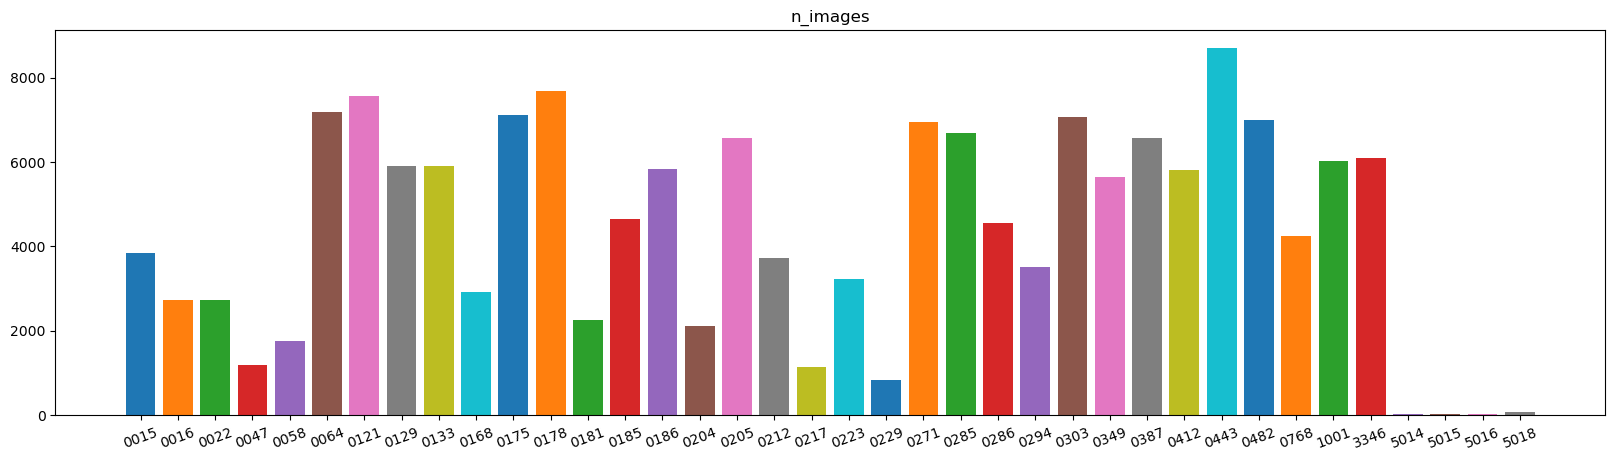

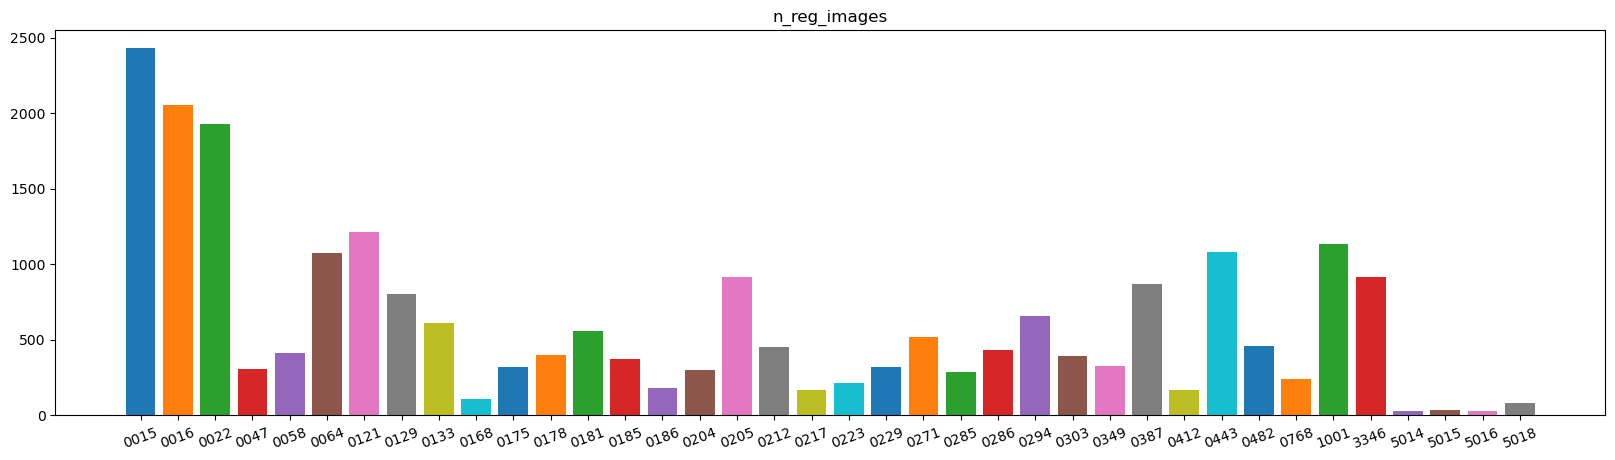

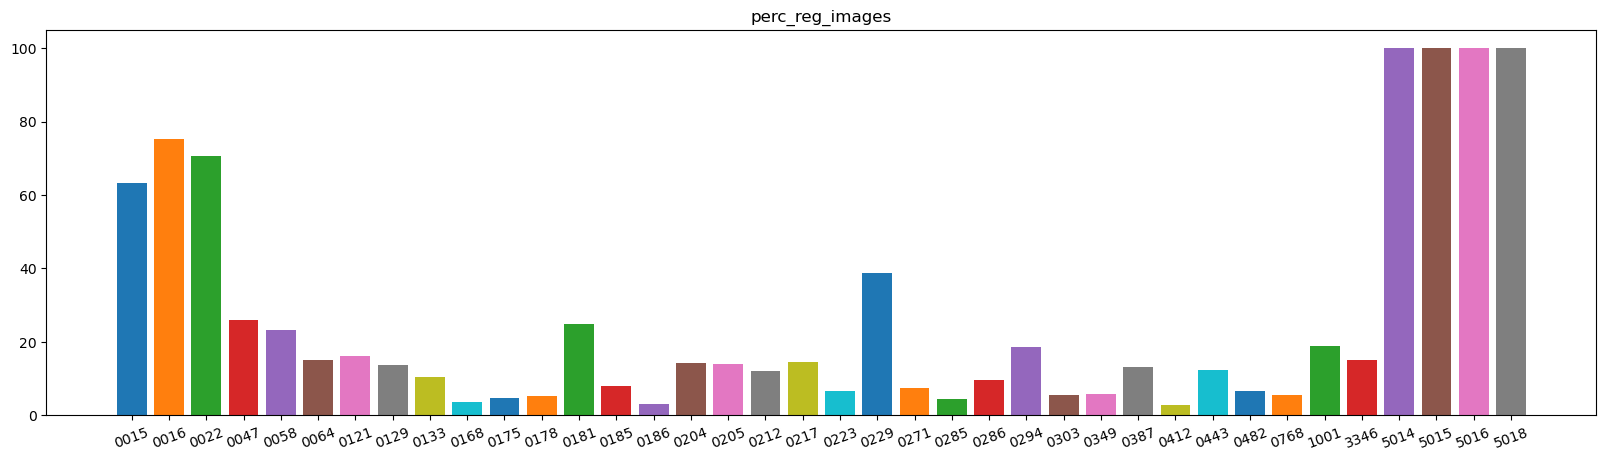

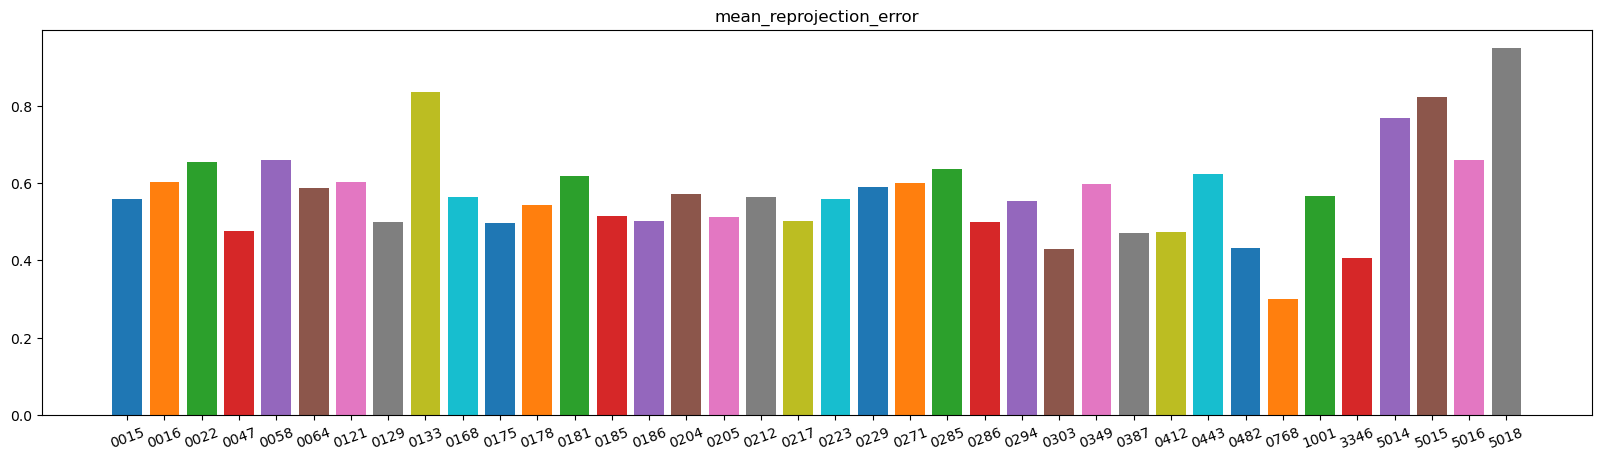

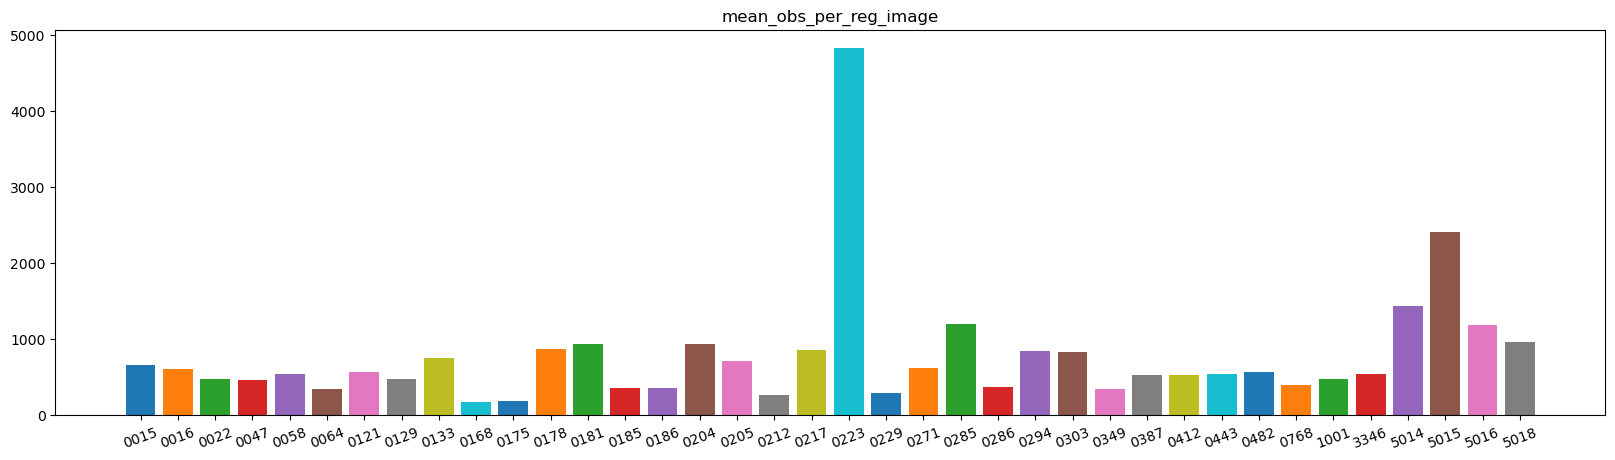

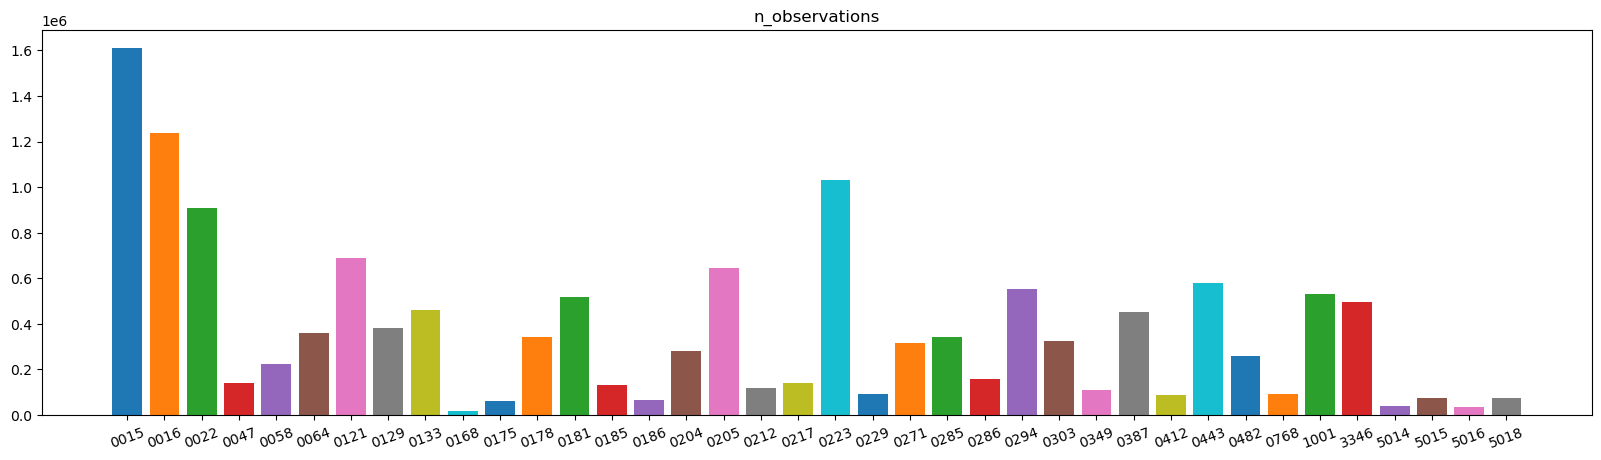

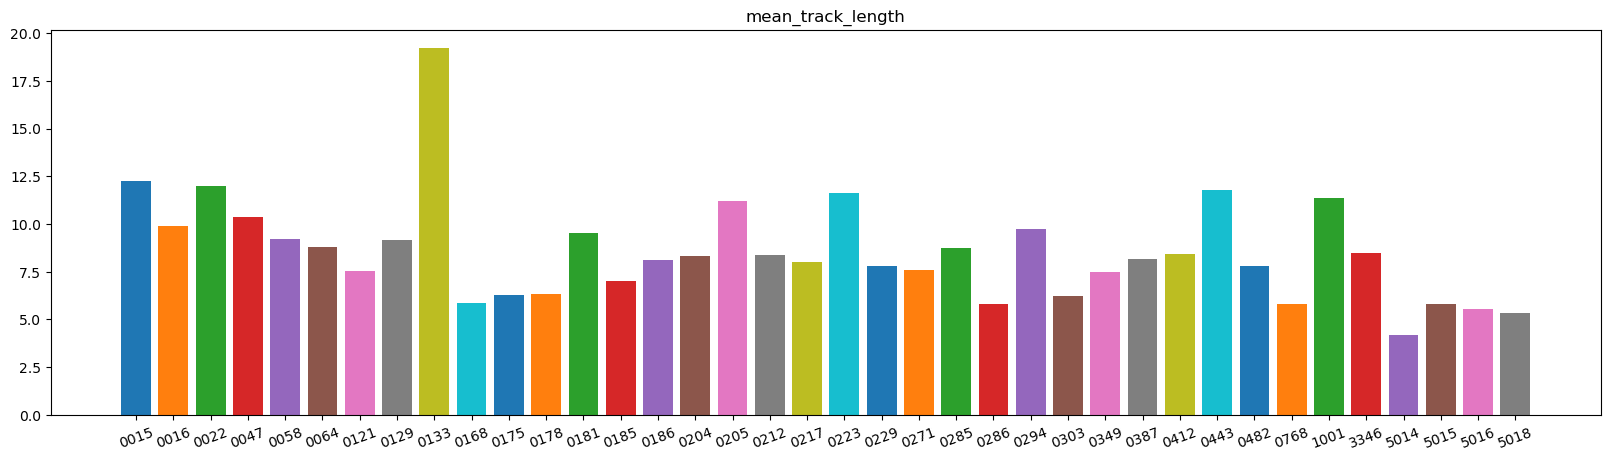

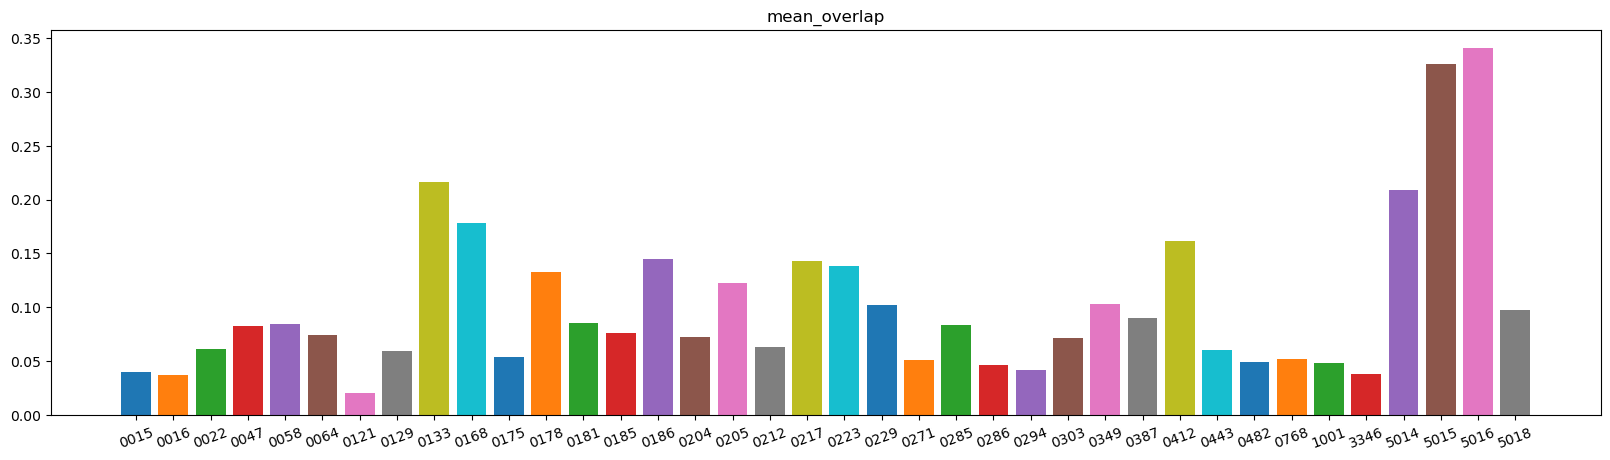

In [5]:
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

for metric in metrics:
    data = [baseline_metrics[scene][0][metric] for scene in scenes]

    plt.figure(figsize=(20, 5))
    plt.title(metric)
    plt.bar(scenes, data, color=colors)
    plt.xticks(rotation=20)
    plt.savefig(f"../plots/baseline_overview/{metric}.png")
    plt.show()


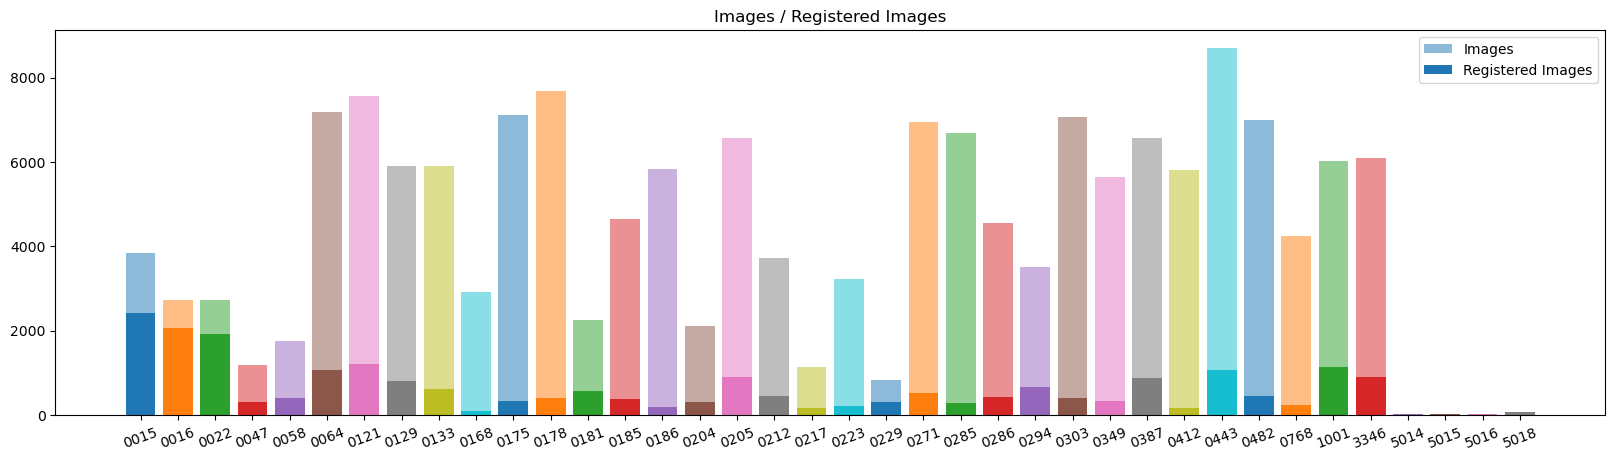

In [6]:
n_images = [baseline_metrics[scene][0]["n_images"] for scene in scenes]
n_reg_images = [baseline_metrics[scene][0]["n_reg_images"] for scene in scenes]

plt.figure(figsize=(20, 5))
plt.title("Images / Registered Images")
plt.bar(scenes, n_images, color=colors, alpha=0.5, label="Images")
plt.bar(scenes, n_reg_images, color=colors, label="Registered Images")
plt.xticks(rotation=20)
plt.legend()

plt.savefig("../plots/baseline_overview/images-vs-reg-images.png")
plt.show()

In [7]:
path = "../data/md_image_counts.txt"
with open(path, "r") as f:
    md_img_counts = f.readlines()

md_img_counts = [line.strip() for line in md_img_counts]
md_img_counts = [int(line) for line in md_img_counts]
len(md_img_counts)

38

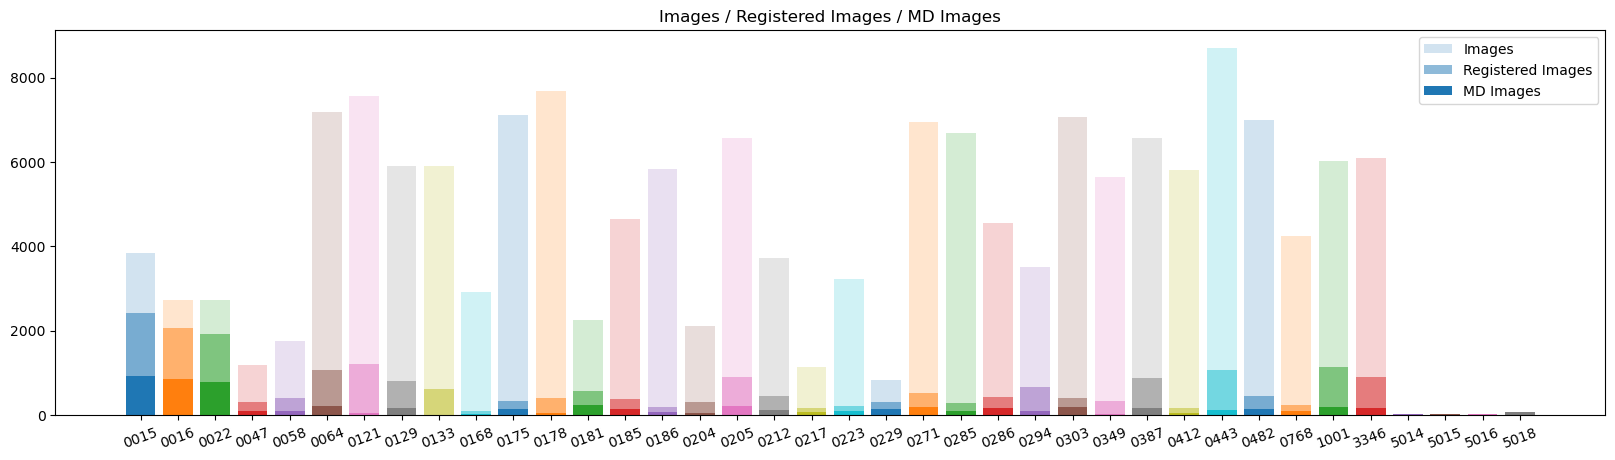

In [8]:
plt.figure(figsize=(20, 5))
plt.title("Images / Registered Images / MD Images")
plt.bar(scenes, n_images, color=colors, alpha=0.2, label="Images")
plt.bar(scenes, n_reg_images, color=colors, alpha=0.5, label="Registered Images")
plt.bar(scenes, md_img_counts, color=colors, label="MD Images")
plt.xticks(rotation=20)
plt.legend()

plt.savefig("../plots/baseline_overview/images-vs-md_images.png")
plt.show()